In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection, preprocessing, metrics
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [ ]:
df = pd.read_excel('Bank_Personal_Loan_Modelling.xlsx',"Data")
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
df['Experience'] = df['Experience'].apply(abs)

In [ ]:
df[["Age","Experience","Income","CCAvg","Mortgage"]] = df[["Age","Experience","Income","CCAvg","Mortgage"]].astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   float64
 2   Experience          5000 non-null   float64
 3   Income              5000 non-null   float64
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   float64
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(5), int64(9)
memory usage: 547.0 KB


In [ ]:
x = df.drop(["ID","Personal Loan"],axis=1)
y = df["Personal Loan"]

In [ ]:
x.tail()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
4995,29.0,3.0,40.0,92697,1,1.9,3,0.0,0,0,1,0
4996,30.0,4.0,15.0,92037,4,0.4,1,85.0,0,0,1,0
4997,63.0,39.0,24.0,93023,2,0.3,3,0.0,0,0,0,0
4998,65.0,40.0,49.0,90034,3,0.5,2,0.0,0,0,1,0
4999,28.0,4.0,83.0,92612,3,0.8,1,0.0,0,0,1,1


In [ ]:
SingleLog_y = np.log1p(x["Mortgage"])
DoubleLog_y = np.log1p(SingleLog_y)

In [ ]:
x["Mortgage"] = DoubleLog_y

In [ ]:
# Dropping irrelevant features
x = x.drop(["ZIP Code","Age","Online"],axis=1)

In [ ]:
# Adding a new feature
x["Combination"] = (x["Income"]/12)**x["CCAvg"]

In [ ]:
x.head()

,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,CreditCard,Combination
0,1.0,49.0,4,1.6,1,0.0,1,0,0,9.497816
1,19.0,34.0,3,1.5,1,0.0,1,0,0,4.769211
2,15.0,11.0,1,1.0,1,0.0,0,0,0,0.916667
3,9.0,100.0,1,2.7,2,0.0,0,0,0,306.344887
4,8.0,45.0,4,1.0,2,0.0,0,0,1,3.750000


In [ ]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler,robust_scale
scaler = StandardScaler()

colscal=["Experience","Mortgage","Income","CCAvg","Combination"]

scaler.fit(x[colscal])
scaled_features = pd.DataFrame(scaler.transform(x[colscal]),columns=colscal)

x =x.drop(colscal,axis=1)
x = scaled_features.join(x)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [ ]:
print(x_train.shape)
print(y_train.shape)

(3500, 10)
(3500,)


In [ ]:
def model(ip_dim):
  classifier = Sequential()
  classifier.add(Dense(units = 10, activation = 'relu', input_dim = ip_dim))
  classifier.add(Dense(units = 20, activation = 'relu'))
  classifier.add(Dropout(0.2))
  classifier.add(Dense(units = 10, activation = 'relu'))
  classifier.add(Dense(units = 1, activation = 'sigmoid'))
  classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
  return classifier

In [ ]:
def get_model_pers(ip_dim):
  classifier = Sequential()
  classifier.add(Dense(units = 6, activation = 'relu', input_dim = ip_dim))
  classifier.add(Dense(units = 12, activation = 'relu'))
  classifier.add(Dense(units = 6, activation = 'relu'))
  classifier.add(Dense(units = 1, activation = 'sigmoid'))
  classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
  return classifier

In [ ]:
def get_model_fin(ip_dim):
  classifier = Sequential()
  classifier.add(Dense(units = 4, activation = 'relu', input_dim = ip_dim))
  classifier.add(Dense(units = 8, activation = 'relu'))
  classifier.add(Dense(units = 4, activation = 'relu'))
  classifier.add(Dense(units = 1, activation = 'sigmoid'))
  classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
  return classifier

In [ ]:
model_combined = model(x_train.shape[1])

In [ ]:
history_combined = model_combined.fit(x_train,y_train,batch_size=32,epochs=50,verbose=2)

Epoch 1/50
 - 0s - loss: 0.5359 - accuracy: 0.8777
Epoch 2/50
 - 0s - loss: 0.2807 - accuracy: 0.9077
Epoch 3/50
 - 0s - loss: 0.2063 - accuracy: 0.9077
Epoch 4/50
 - 0s - loss: 0.1749 - accuracy: 0.9077
Epoch 5/50
 - 0s - loss: 0.1584 - accuracy: 0.9137
Epoch 6/50
 - 0s - loss: 0.1403 - accuracy: 0.9420
Epoch 7/50
 - 0s - loss: 0.1240 - accuracy: 0.9546
Epoch 8/50
 - 0s - loss: 0.1091 - accuracy: 0.9597
Epoch 9/50
 - 0s - loss: 0.1014 - accuracy: 0.9634
Epoch 10/50
 - 0s - loss: 0.0924 - accuracy: 0.9649
Epoch 11/50
 - 0s - loss: 0.0896 - accuracy: 0.9671
Epoch 12/50
 - 0s - loss: 0.0860 - accuracy: 0.9666
Epoch 13/50
 - 0s - loss: 0.0787 - accuracy: 0.9740
Epoch 14/50
 - 0s - loss: 0.0761 - accuracy: 0.9737
Epoch 15/50
 - 0s - loss: 0.0769 - accuracy: 0.9737
Epoch 16/50
 - 0s - loss: 0.0768 - accuracy: 0.9726
Epoch 17/50
 - 0s - loss: 0.0690 - accuracy: 0.9769
Epoch 18/50
 - 0s - loss: 0.0710 - accuracy: 0.9766
Epoch 19/50
 - 0s - loss: 0.0692 - accuracy: 0.9769
Epoch 20/50
 - 0s - l

In [ ]:
y_pred = model_combined.predict(x_test)
print(accuracy_score(y_test,y_pred.round()))

0.9833333333333333


In [ ]:
x_train_fin = x_train.drop(["Education","Family","Experience","CCAvg","Mortgage","Income"],axis=1)
x_train_pers = x_train.drop(["Securities Account","CD Account","CreditCard","Combination"],axis=1)

In [ ]:
x_train_pers.head()

,Experience,Mortgage,Income,CCAvg,Family,Education
1840,0.426264,1.376467,-1.103089,-0.880069,4,3
2115,0.951932,-0.665621,-0.951011,-0.307820,3,1
4437,1.565212,-0.665621,-0.234074,-0.250595,2,1
1146,-1.150740,1.350136,-0.060271,-1.051744,1,1
2486,1.389989,1.589034,1.221527,-0.365045,1,1


In [ ]:
x_test_fin = x_test.drop(["Education","Family","Experience","CCAvg","Mortgage","Income"],axis=1)
x_test_pers = x_test.drop(["Securities Account","CD Account","CreditCard","Combination"],axis=1)

In [ ]:
x_test_fin.head()

,Combination,Securities Account,CD Account,CreditCard
1501,-0.028303,1,0,1
2586,-0.028198,0,0,1
2653,-0.028303,0,0,0
1055,-0.028303,1,0,0
705,-0.028303,0,0,0


In [ ]:
model_pers = get_model_pers(x_train_pers.shape[1])

In [ ]:
history_pers = model_pers.fit(x_train_pers,y_train,batch_size=32,epochs=50,verbose=2)

Epoch 1/50
 - 0s - loss: 0.3585 - accuracy: 0.9049
Epoch 2/50
 - 0s - loss: 0.2524 - accuracy: 0.9077
Epoch 3/50
 - 0s - loss: 0.2254 - accuracy: 0.9077
Epoch 4/50
 - 0s - loss: 0.1979 - accuracy: 0.9080
Epoch 5/50
 - 0s - loss: 0.1727 - accuracy: 0.9271
Epoch 6/50
 - 0s - loss: 0.1493 - accuracy: 0.9446
Epoch 7/50
 - 0s - loss: 0.1289 - accuracy: 0.9554
Epoch 8/50
 - 0s - loss: 0.1119 - accuracy: 0.9634
Epoch 9/50
 - 0s - loss: 0.1005 - accuracy: 0.9677
Epoch 10/50
 - 0s - loss: 0.0950 - accuracy: 0.9689
Epoch 11/50
 - 0s - loss: 0.0882 - accuracy: 0.9711
Epoch 12/50
 - 0s - loss: 0.0846 - accuracy: 0.9734
Epoch 13/50
 - 0s - loss: 0.0815 - accuracy: 0.9746
Epoch 14/50
 - 0s - loss: 0.0786 - accuracy: 0.9737
Epoch 15/50
 - 0s - loss: 0.0775 - accuracy: 0.9751
Epoch 16/50
 - 0s - loss: 0.0760 - accuracy: 0.9749
Epoch 17/50
 - 0s - loss: 0.0760 - accuracy: 0.9751
Epoch 18/50
 - 0s - loss: 0.0739 - accuracy: 0.9771
Epoch 19/50
 - 0s - loss: 0.0738 - accuracy: 0.9774
Epoch 20/50
 - 0s - l

In [ ]:
y_pred_pers = model_pers.predict(x_test_pers)
print(accuracy_score(y_test,y_pred_pers.round()))

0.98


In [ ]:
model_fin = get_model_fin(x_train_fin.shape[1])

In [ ]:
history_fin = model_fin.fit(x_train_fin,y_train,epochs=50,verbose=2)

Epoch 1/50
 - 0s - loss: 0.6725 - accuracy: 0.8720
Epoch 2/50
 - 0s - loss: 0.6318 - accuracy: 0.9080
Epoch 3/50
 - 0s - loss: 0.5953 - accuracy: 0.9080
Epoch 4/50
 - 0s - loss: 0.5626 - accuracy: 0.9080
Epoch 5/50
 - 0s - loss: 0.5334 - accuracy: 0.9080
Epoch 6/50
 - 0s - loss: 0.5072 - accuracy: 0.9080
Epoch 7/50
 - 0s - loss: 0.4839 - accuracy: 0.9080
Epoch 8/50
 - 0s - loss: 0.4631 - accuracy: 0.9080
Epoch 9/50
 - 0s - loss: 0.4446 - accuracy: 0.9080
Epoch 10/50
 - 0s - loss: 0.4281 - accuracy: 0.9080
Epoch 11/50
 - 0s - loss: 0.4129 - accuracy: 0.9080
Epoch 12/50
 - 0s - loss: 0.3984 - accuracy: 0.9080
Epoch 13/50
 - 0s - loss: 0.3845 - accuracy: 0.9080
Epoch 14/50
 - 0s - loss: 0.3713 - accuracy: 0.9080
Epoch 15/50
 - 0s - loss: 0.3599 - accuracy: 0.9083
Epoch 16/50
 - 0s - loss: 0.3492 - accuracy: 0.9080
Epoch 17/50
 - 0s - loss: 0.3402 - accuracy: 0.9080
Epoch 18/50
 - 0s - loss: 0.3320 - accuracy: 0.9086
Epoch 19/50
 - 0s - loss: 0.3250 - accuracy: 0.9094
Epoch 20/50
 - 0s - l

In [ ]:
y_pred_fin = model_fin.predict(x_test_fin)
print(accuracy_score(y_test,y_pred_fin.round()))

0.9093333333333333


In [ ]:
1 - sum(y_test)/y_test.shape[0]

0.8953333333333333

In [ ]:
model_pers.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 6)                 42        
_________________________________________________________________
dense_36 (Dense)             (None, 12)                84        
_________________________________________________________________
dense_37 (Dense)             (None, 6)                 78        
_________________________________________________________________
dense_38 (Dense)             (None, 1)                 7         
Total params: 211
Trainable params: 211
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_fin.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_40 (Dense)             (None, 8)                 40        
_________________________________________________________________
dense_41 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_42 (Dense)             (None, 1)                 5         
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras.models import Model

In [ ]:
def return_intermed(model):
  return Model(inputs=model.layers[0].input, outputs=model.layers[2].output)

In [ ]:
mod_intermed_pers = return_intermed(model_pers)

In [ ]:
train_pers_inter = mod_intermed_pers.predict(x_train_pers)

In [ ]:
mod_intermed_fin = return_intermed(model_fin)

In [ ]:
train_fin_inter = mod_intermed_fin.predict(x_train_fin)

In [ ]:
train_combined_inter = np.concatenate((train_pers_inter,train_fin_inter),axis=1)

In [ ]:
train_combined_inter.shape

(3500, 10)

In [ ]:
test_pers_inter = mod_intermed_pers.predict(x_test_pers)
test_fin_inter = mod_intermed_fin.predict(x_test_fin)

test_combined_inter = np.concatenate((test_pers_inter,test_fin_inter),axis=1)

In [ ]:
test_combined_inter.shape

(1500, 10)

In [ ]:
model_inter = model(train_combined_inter.shape[1])

In [ ]:
history_inter = model_inter.fit(train_combined_inter,y_train,epochs=50,verbose=2)

Epoch 1/50
 - 0s - loss: 0.2420 - accuracy: 0.9377
Epoch 2/50
 - 0s - loss: 0.0941 - accuracy: 0.9737
Epoch 3/50
 - 0s - loss: 0.0728 - accuracy: 0.9777
Epoch 4/50
 - 0s - loss: 0.0695 - accuracy: 0.9800
Epoch 5/50
 - 0s - loss: 0.0679 - accuracy: 0.9803
Epoch 6/50
 - 0s - loss: 0.0632 - accuracy: 0.9814
Epoch 7/50
 - 0s - loss: 0.0665 - accuracy: 0.9789
Epoch 8/50
 - 0s - loss: 0.0591 - accuracy: 0.9826
Epoch 9/50
 - 0s - loss: 0.0619 - accuracy: 0.9811
Epoch 10/50
 - 0s - loss: 0.0589 - accuracy: 0.9811
Epoch 11/50
 - 0s - loss: 0.0602 - accuracy: 0.9814
Epoch 12/50
 - 0s - loss: 0.0589 - accuracy: 0.9826
Epoch 13/50
 - 0s - loss: 0.0598 - accuracy: 0.9829
Epoch 14/50
 - 0s - loss: 0.0583 - accuracy: 0.9814
Epoch 15/50
 - 0s - loss: 0.0557 - accuracy: 0.9837
Epoch 16/50
 - 0s - loss: 0.0566 - accuracy: 0.9823
Epoch 17/50
 - 0s - loss: 0.0563 - accuracy: 0.9826
Epoch 18/50
 - 0s - loss: 0.0551 - accuracy: 0.9840
Epoch 19/50
 - 0s - loss: 0.0531 - accuracy: 0.9823
Epoch 20/50
 - 0s - l

In [ ]:
y_pred_inter = model_inter.predict(test_combined_inter)
print(accuracy_score(y_test,y_pred_inter.round()))

0.9813333333333333


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,y_pred.round()))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1343
           1       0.95      0.89      0.92       157

    accuracy                           0.98      1500
   macro avg       0.97      0.94      0.95      1500
weighted avg       0.98      0.98      0.98      1500



In [ ]:
print(classification_report(y_test,y_pred_inter.round()))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1343
           1       0.96      0.85      0.91       157

    accuracy                           0.98      1500
   macro avg       0.97      0.92      0.95      1500
weighted avg       0.98      0.98      0.98      1500



In [ ]:
print(classification_report(y_test,y_pred_pers.round()))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1343
           1       0.96      0.84      0.90       157

    accuracy                           0.98      1500
   macro avg       0.97      0.92      0.94      1500
weighted avg       0.98      0.98      0.98      1500



In [ ]:
print(classification_report(y_test,y_pred_fin.round()))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1343
           1       0.65      0.29      0.40       157

    accuracy                           0.91      1500
   macro avg       0.79      0.63      0.67      1500
weighted avg       0.89      0.91      0.89      1500



In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# summarize history for accuracy and loss during training
def get_training_plot(history,string):
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['loss'])
  title_cap = "Model accuracy and loss variation for " + string
  plt.title(title_cap)
  plt.ylabel('Value')
  plt.xlabel('epoch')
  plt.legend(['Accuracy', 'Loss'], loc='center right')
  plt.show()

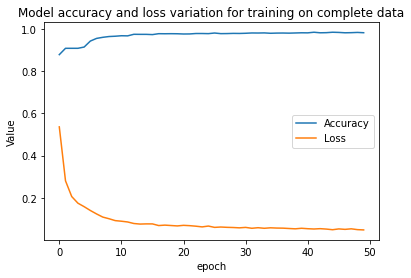

In [ ]:
get_training_plot(history_combined,"training on complete data")

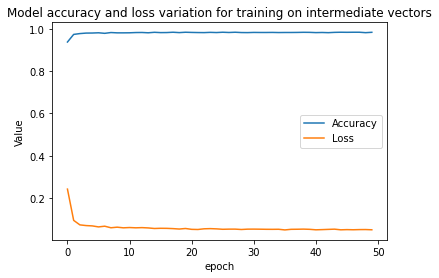

In [ ]:
get_training_plot(history_inter,"training on intermediate vectors")

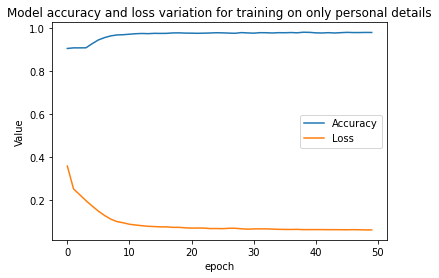

In [ ]:
get_training_plot(history_pers,"training on only personal details")

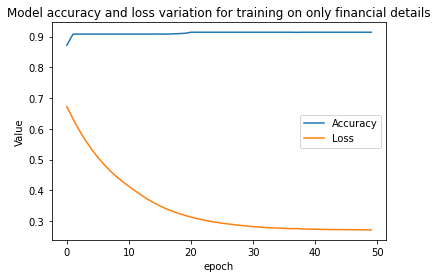

In [ ]:
get_training_plot(history_fin,"training on only financial details")

***And finally, Jai Mata Di! :D***